In [1]:
#Simple Linear Regression for breast cancer dataset

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
import pandas as pd

cancer = pd.read_csv('breastCancer.csv')

In [3]:
cancer

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
#Example of encoding
from sklearn import preprocessing

#create the lalbelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_values = le.fit_transform(cancer['class'])
print(encoded_values)

cancer['2/4'] = le.fit_transform(cancer['class'])
cancer

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,2/4
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


In [6]:
cancer.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class', '2/4'],
      dtype='object')

In [7]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = pd.DataFrame(cancer[['clump_thickness', 'size_uniformity', 'shape_uniformity','marginal_adhesion', 'epithelial_size', 'bland_chromatin', 'normal_nucleoli', 'mitoses']])
y= pd.DataFrame(cancer['2/4'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [9]:
#Now using logistic regression on training data
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cla_log = LogisticRegression()
cla_log.fit(X_train,y_train)

C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus 1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = cla_log.predict(X_test)
print('y_pred : ',y_pred)

y_pred :  [0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0]


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83  2]
 [ 3 52]]


In [12]:
#accuracy
metrics.accuracy_score(y_test,y_pred)

0.9642857142857143

<h1>RANDOM FOREST

In [13]:
#Now using  Random forests on  complete traning data
from sklearn.ensemble import RandomForestClassifier
cla_forest = RandomForestClassifier(n_estimators = 100)
cla_forest.fit(X_train,y_train)

#Predict 
#y_pred = cla_forest.predict(X_test)
#print(y_pred)
#y_test2 = [x for x in y_test['survived']]
#print('Test Score:{:.6f}'.format(np.mean(y_pred== y_test2)))

from sklearn.metrics import accuracy_score
accur=accuracy_score(y_test,y_pred)
print("Test Accuracy:{:.6f}".format(accur))

Test Accuracy:0.964286


C:\Users\Asus 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [14]:
col_names = X_train.columns.tolist()
print(col_names)
features_imp =pd.Series(cla_forest.feature_importances_,index = col_names).sort_values(ascending = False)
features_imp

['clump_thickness', 'size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 'bland_chromatin', 'normal_nucleoli', 'mitoses']


shape_uniformity     0.246174
size_uniformity      0.226577
epithelial_size      0.130235
normal_nucleoli      0.114442
bland_chromatin      0.101010
clump_thickness      0.095593
marginal_adhesion    0.075176
mitoses              0.010792
dtype: float64

<h2><font face="verdana" color = 'orange'>KNN Impementation....

In [15]:
#RidingMowers.csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rm = pd.read_csv('RidingMowers.csv')
rm

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought
...,...,...,...
175,86,121,Bought
176,87,109,Bought
177,88,119,Bought
178,89,110,Bought


In [16]:
print(rm.shape)
print(rm.describe())

(180, 3)
           Income    Lot_Size
count  180.000000  180.000000
mean    58.383333   69.361111
std     16.469126   29.641200
min     34.000000   20.000000
25%     44.000000   42.750000
50%     56.000000   69.000000
75%     73.000000   93.750000
max     89.000000  124.000000


In [17]:
nan_cols = rm.columns[rm.isnull().any()]
rm[nan_cols].isnull().sum()

Series([], dtype: float64)

<Figure size 576x576 with 0 Axes>

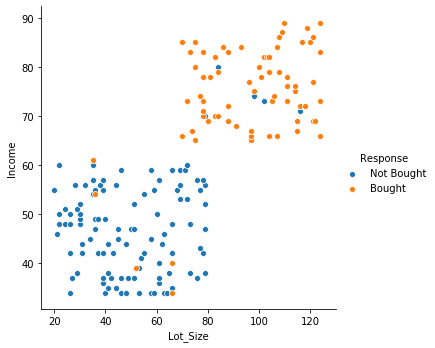

In [18]:
plt.figure(figsize =(8,8))
sns.pairplot(x_vars = ['Lot_Size'], y_vars = ['Income'],data =rm, hue ='Response',height = 5)
plt.show()

7 January

In [19]:
X = rm[['Income','Lot_Size']]
y = pd.DataFrame(rm['Response'])
print(X.head())
print(y.head())

   Income  Lot_Size
0      34        26
1      34        40
2      34        46
3      34        48
4      34        53
     Response
0  Not Bought
1  Not Bought
2  Not Bought
3  Not Bought
4  Not Bought


In [20]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 100)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

C:\Users\Asus 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#make prediction for test data
y_pred = classifier.predict(X_test)

In [23]:
#Evaluation

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
accur = accuracy_score(y_test, y_pred)
print('Test Accuracy :{:.6f}'.format(accur))

[[24  2]
 [ 1 27]]
Test Accuracy :0.944444


## 14 January

In [24]:
#Now using  Random forests on  complete traning data
from sklearn.ensemble import RandomForestClassifier
cla_forest = RandomForestClassifier(n_estimators = 100)
cla_forest.fit(X_train,y_train)

#Predict 
#y_pred = cla_forest.predict(X_test)
#print(y_pred)
#y_test2 = [x for x in y_test['survived']]
#print('Test Score:{:.6f}'.format(np.mean(y_pred== y_test2)))

from sklearn.metrics import accuracy_score
accur=accuracy_score(y_test,y_pred)
print("Test Accuracy:{:.6f}".format(accur))

Test Accuracy:0.944444


C:\Users\Asus 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [25]:
col_names = X_train.columns.tolist()
print(col_names)
features_imp =pd.Series(cla_forest.feature_importances_,index = col_names).sort_values(ascending = False)
features_imp

['Income', 'Lot_Size']


Income      0.513777
Lot_Size    0.486223
dtype: float64

In [26]:
y_test

,Response
88,Not Bought
145,Bought
11,Not Bought
74,Not Bought
173,Bought
150,Bought
151,Bought
97,Not Bought
90,Not Bought
96,Not Bought
